# 03 SRI per Page

In [1]:
import re
from glob import iglob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the data

In [2]:
def loadData(path):
    frames = []
    for file in iglob(path, recursive=True):
        crawl = re.findall(r'/(\d{4}-\d{2})/', file)
        date = datetime.datetime.strptime(crawl[0] + "-1", "%Y-%W-%w")
        frame = sqlContext.read.parquet(file).toPandas()
        frame['date'] = date
        frames.append(frame)
    return pd.concat(frames, ignore_index=True).set_index('date').sort_index()

In [3]:
data = loadData('../data/sri/*/reports/03_page_per_sri_evolution_all/')

## Plot the data

In [4]:
data

,all_count,all_max,all_min,all_mean,all_stddev,sri_count,sri_max,sri_min,sri_mean,sri_stddev,link_count,link_max,link_min,link_mean,link_stddev,script_count,script_max,script_min,script_mean,script_stddev
date,,,,,,,,,,,,,,,,,,,,
2016-05-02,1185678,609,1,31.977167,22.659379,1185678,23,1,2.039146,1.648223,1185678,14,0,0.692764,0.912657,1185678,13,0,1.346382,1.094798
2017-02-27,20774415,3935,1,38.628977,28.118862,20774415,52,1,1.633327,1.396249,20774415,24,0,0.555552,0.705661,20774415,50,0,1.077776,1.127054
2017-08-21,24854789,3940,1,39.685240,30.623120,24854789,141,1,1.635910,1.578243,24854789,141,0,0.511307,0.742786,24854789,76,0,1.124604,1.363522
2018-02-26,38565498,7826,1,37.142568,27.376777,38565498,83,1,1.729904,1.749797,38565498,83,0,0.538089,0.927571,38565498,62,0,1.191815,1.254580
2018-08-20,56356748,4211,1,39.644113,27.376229,56356748,122,1,2.005382,1.498866,56356748,100,0,0.480424,0.837526,56356748,122,0,1.524958,1.225812
2019-03-04,74357335,9339,1,39.517394,28.255479,74357335,820,1,1.890633,1.612475,74357335,452,0,0.604736,0.834401,74357335,815,0,1.285897,1.347678


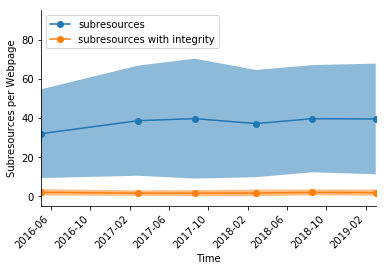

In [7]:
ax = data['all_mean'].plot(label='subresources', style='o-')
plt.fill_between(data.index, data['all_mean'] - data['all_stddev'], data['all_mean'] + data['all_stddev'], alpha=0.5 )

data['sri_mean'].plot(label='subresources with integrity', style='o-')
plt.fill_between(data.index, data['sri_mean'] - data['sri_stddev'], data['sri_mean'] + data['sri_stddev'], alpha=0.5 )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Time')
plt.ylabel('Subresources per Webpage')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.ylim(-5, 95)
plt.savefig('03_pages_per_sri_evolution.pdf', bbox_inches = 'tight')